# About Dataset
Black Friday Sales 
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,068 rows and 12 columns.

Data Overview¶
Dataset has 550068 rows (transactions) and 12 columns (features) as described below:

# Features
User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.

Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.

Gender: indicates the gender of the person making the transaction.

Age: indicates the age group of the person making the transaction.

Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

Marital_Status: is 0 if the user is not married and 1 otherwise.

Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

Purchase: Purchase amount.

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [258]:
df=pd.read_csv(r'/content/BlackFridaySaleDataset.csv')

In [259]:
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

In [260]:
df.shape

(550068, 12)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [262]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [263]:
df.describe(include='O')

Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     550068
unique       3631       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1880  414259  219587        231173                     193821

### Data Cleaning

In [264]:
df.duplicated().sum()

0

In [265]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

missing_values  percent_missing
User_ID                                  0         0.000000
Product_ID                               0         0.000000
Gender                                   0         0.000000
Age                                      0         0.000000
Occupation                               0         0.000000
City_Category                            0         0.000000
Stay_In_Current_City_Years               0         0.000000
Marital_Status                           0         0.000000
Product_Category_1                       0         0.000000
Product_Category_2                  173638        31.566643
Product_Category_3                  383247        69.672659
Purchase                                 0         0.000000

In [266]:
#dropping Product_category_3 as it has very large number of null values
df.drop('Product_Category_3',axis=1,inplace=True)

In [267]:
median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

In [268]:
df.isnull().sum()[df.isnull().sum()>1]

Series([], dtype: int64)

In [269]:
for i in df.columns:
    print('columns: ',i)
    print(f'Nunique: {df[i].nunique()}')
    print(f'Unique: {df[i].unique()}')
    print(30*'==')

columns:  User_ID
Nunique: 5891
Unique: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
columns:  Product_ID
Nunique: 3631
Unique: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
columns:  Gender
Nunique: 2
Unique: ['F' 'M']
columns:  Age
Nunique: 7
Unique: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
columns:  Occupation
Nunique: 21
Unique: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
columns:  City_Category
Nunique: 3
Unique: ['A' 'C' 'B']
columns:  Stay_In_Current_City_Years
Nunique: 5
Unique: ['2' '4+' '3' '1' '0']
columns:  Marital_Status
Nunique: 2
Unique: [0 1]
columns:  Product_Category_1
Nunique: 20
Unique: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
columns:  Product_Category_2
Nunique: 17
Unique: [ 9.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12. 10. 17. 13.  7. 18.]
columns:  Purchase
Nunique: 18105
Unique: [ 8370 15200  1422 ...   135   123   613]


### EDA
##### Target variable: Purchase


Text(0.5, 0, 'Purchase')

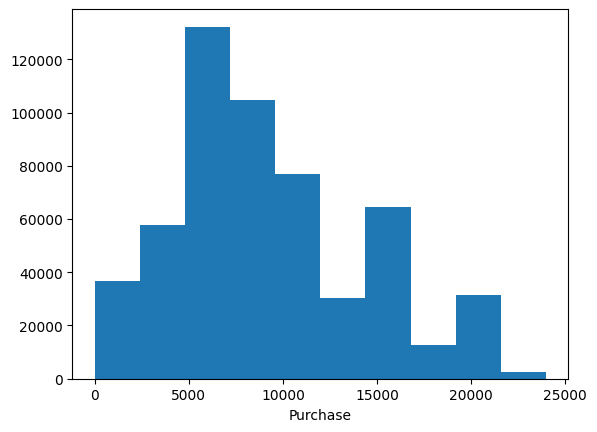

In [270]:
plt.hist(df.Purchase)
plt.xlabel('Purchase')

* The bars in the graph show the frequency of purchases at various levels.
* Notably, the highest frequency occurs for purchases in the range of approximately 5000 to 10000.
* As the purchase amount increases beyond this range, there’s a noticeable decline in frequency.

<Axes: xlabel='Gender', ylabel='count'>

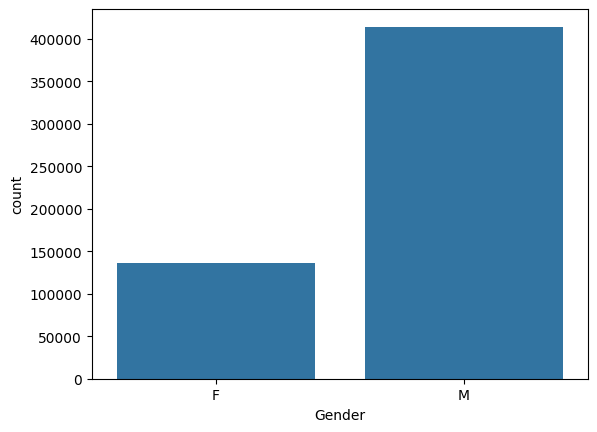

In [271]:
sns.countplot(x=df.Gender)

* The highest number of Black Friday purchases were made by males.

Text(0, 0.5, 'avg Purchase')

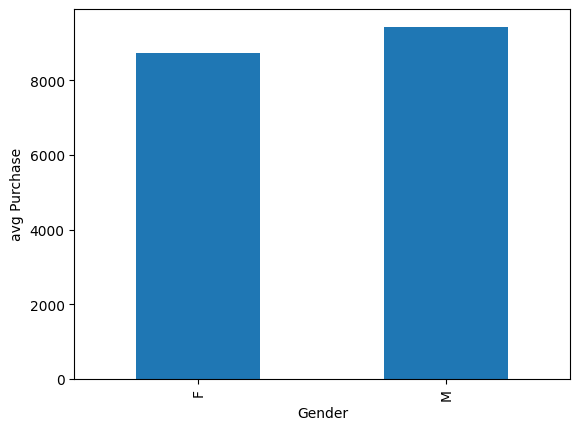

In [272]:
df.groupby('Gender')['Purchase'].mean().plot(kind='bar')
plt.ylabel('avg Purchase')

*  It appears that the average purchase amount for males (“M”) is higher than that for females (“F”).

<Axes: xlabel='Age', ylabel='count'>

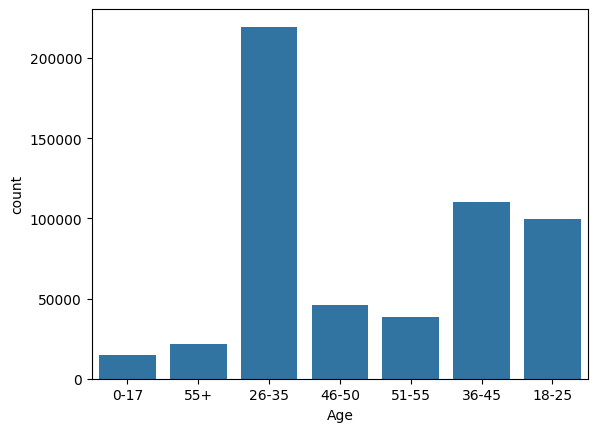

In [273]:
sns.countplot(x=df.Age)

* The highest number of Black Friday purchases were made by age group of 26-35.

Text(0, 0.5, 'avg Purchase')

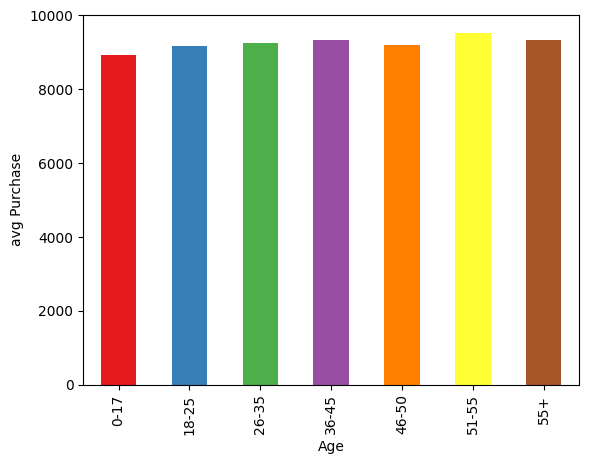

In [274]:
df.groupby('Age')['Purchase'].mean().plot(kind='bar',color = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628'])
plt.ylabel('avg Purchase')

* The highest average purchases were made by the age group of 51-55.

<Axes: xlabel='Occupation'>

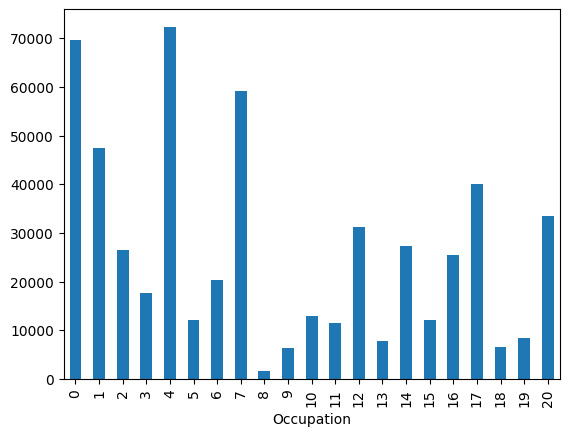

In [275]:
df.groupby('Occupation')['Purchase'].count().plot(kind='bar')

* The highest number of Black Friday purchases were made by individuals in the 4th occupation group.

<Axes: >

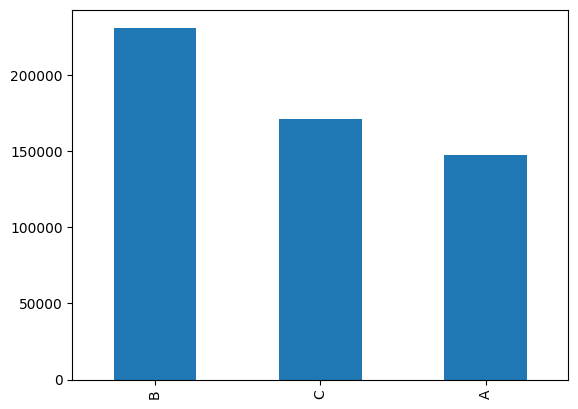

In [276]:
df.City_Category.value_counts().plot(kind='bar')

<Axes: xlabel='City_Category'>

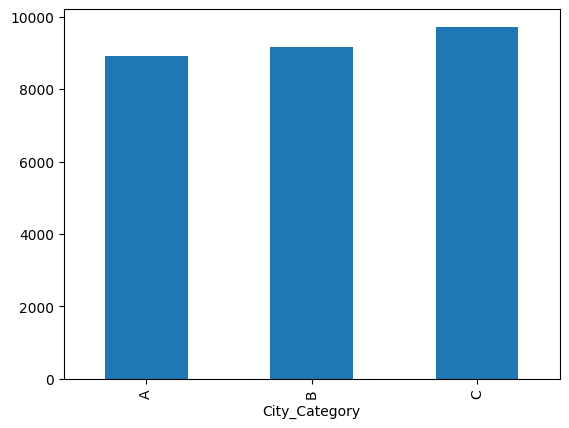

In [277]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='bar')

<Axes: xlabel='Marital_Status'>

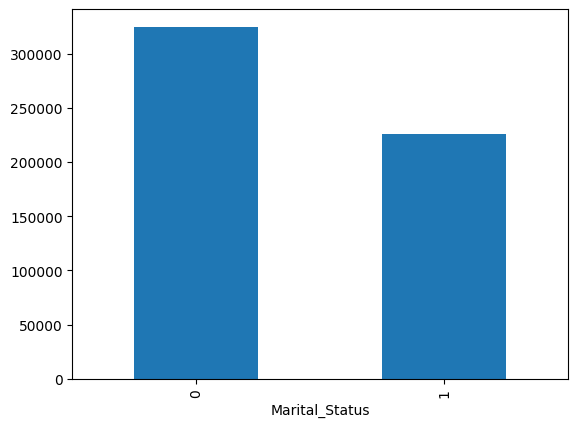

In [278]:
df.groupby('Marital_Status')['Purchase'].count().plot(kind='bar')

* This graph we come to know that purchase rate is more in singles rather than in married.

<Axes: xlabel='Age', ylabel='Purchase'>

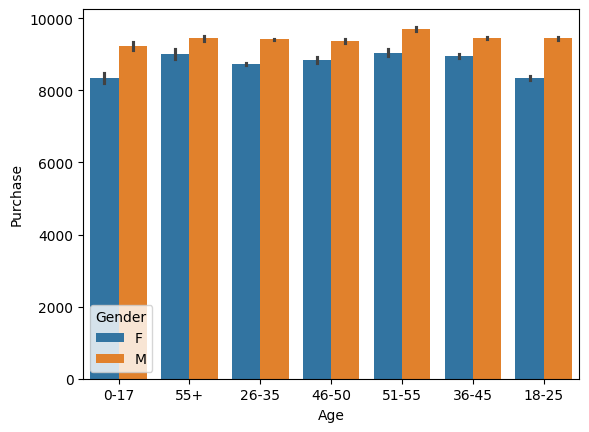

In [279]:
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender')

* This graph we come to know that purchase rate is more in males in all categories of age group.

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

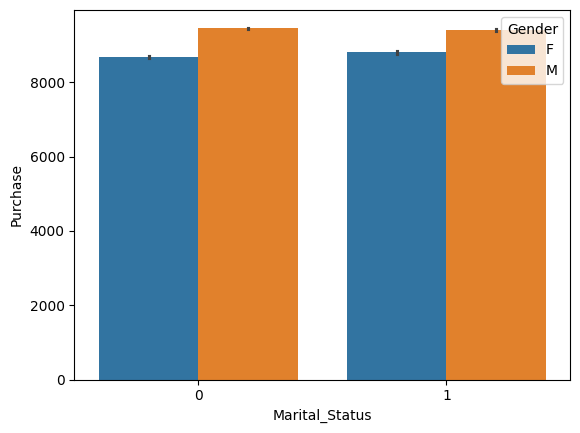

In [280]:
sns.barplot(x='Marital_Status',y='Purchase',data=df,hue='Gender')

* This graph we come to know that purchase rate is more in males even in both the status.

In [281]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [282]:
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Purchase  
0               0                   3                 9.0      8370  
1               0                   1                 6.0     15200  
2               0                  12                 9.0      1422  
3               0                  12                14.0      1057  
4               0                   8                 9.0      7969

<Axes: >

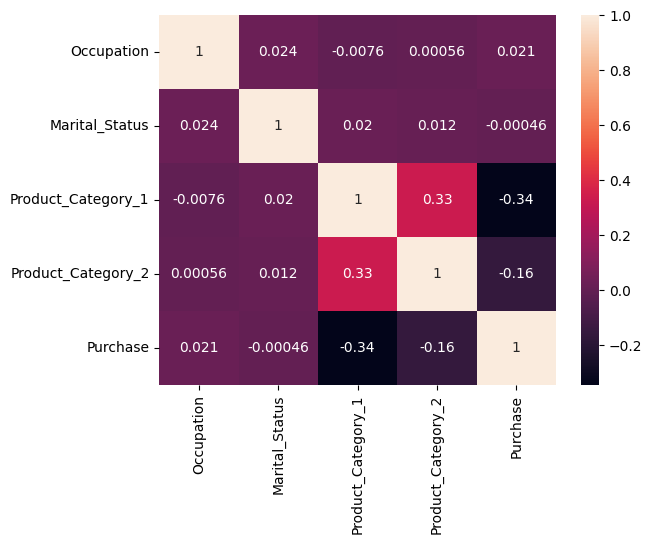

In [296]:
sns.heatmap(df.corr(),annot=True)

* Product_Category_1 has a negative correlation of approximately -0.34 with Purchase. This suggests that higher purchases are associated with lower values in Product Category 1.  
* Similarly, Product_Category_2 exhibits a negative correlation of approximately -0.16 with Purchase. Again, this implies that higher purchases are linked to lower values in Product Category 2.
Occupation:
* Occupation shows a weak positive correlation with Purchase. While this correlation is not very strong, it suggests that certain occupations may be associated with slightly higher purchase behavior.
* Marital_Status has an almost negligible negative correlation with Purchase. This indicates that marital status alone does not significantly impact purchase behavior.

In [219]:
df.corr()

Occupation  Marital_Status  Product_Category_1  \
Occupation            1.000000        0.024280           -0.007618   
Marital_Status        0.024280        1.000000            0.019888   
Product_Category_1   -0.007618        0.019888            1.000000   
Product_Category_2   -0.000480        0.012680            0.381220   
Product_Category_3    0.006556        0.011284            0.112403   
Purchase              0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
Occupation                   -0.000480            0.006556  0.020833  
Marital_Status                0.012680            0.011284 -0.000463  
Product_Category_1            0.381220            0.112403 -0.343703  
Product_Category_2            1.000000            0.350877 -0.183390  
Product_Category_3            0.350877            1.000000 -0.033295  
Purchase                     -0.183390           -0.033295  1.000000

In [220]:
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Single', 1: 'Married'})
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

  Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0         Single                   3                10.0                13.0   
1         Single                   1                 6.0                14.0   
2         Single                  12                10.0                13.0   
3         Single                  12                14.0                13.0   
4         Single                   8                10.0                13.0   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969

### Model Building

In [285]:
df1=df.copy(deep=True)

In [287]:
df_Gender = pd.get_dummies(df['Gender'])
df_Age = pd.get_dummies(df['Age'])
df_City_Category = pd.get_dummies(df['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(df['Stay_In_Current_City_Years'])

data_final= pd.concat([df, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Purchase  F  M  \
0               0                   3                 9.0      8370  1  0   
1               0                   1                 6.0     15200  1  0   
2               0                  12                 9.0      1422  1  0   
3               0                  12                14.0      1057  1  0   
4               0                   8                 9.0      7969  0  1   

   0-17  18-25  26-35  36-45  46-50  51-55  55+  A  B  C  0  1  2  3  4+  
0     1      0      0      0      0      0    0  1  0  0  0  0  1  0   0  
1     1      0      0      0      0      0    0  1  0  0  0  0  1  0   0  
2     1      0      0      0      0      0    0  1  0  0  0  0  1  0   0  
3     1      0      0      0      0      0    0  1  0  0  0  0  1  0   0  
4     0      0      0      0      0      0    1  0  0  1  0  0  0  0   1

In [288]:
df2 = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
df2.head()

Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0          10               0                   3                 9.0   
1          10               0                   1                 6.0   
2          10               0                  12                 9.0   
3          10               0                  12                14.0   
4          16               0                   8                 9.0   

   Purchase  F  M  0-17  18-25  26-35  36-45  46-50  51-55  55+  A  B  C  0  \
0      8370  1  0     1      0      0      0      0      0    0  1  0  0  0   
1     15200  1  0     1      0      0      0      0      0    0  1  0  0  0   
2      1422  1  0     1      0      0      0      0      0    0  1  0  0  0   
3      1057  1  0     1      0      0      0      0      0    0  1  0  0  0   
4      7969  0  1     0      0      0      0      0      0    1  0  0  1  0   

   1  2  3  4+  
0  0  1  0   0  
1  0  1  0   0  
2  0  1  0   0  
3  0  1  0   0  
4  0  0  0   1

In [289]:
from sklearn.model_selection import train_test_split

# Train Test Split

X = df2.drop(['Purchase'], axis = 1)
y = df2['Purchase']

# split data into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

# check the dimensions of the train & test subset for

print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (385047, 21)
The shape of X_test is: (165021, 21)
The shape of y_train is: (385047,)
The shape of y_test is: (165021,)


In [290]:
from sklearn.preprocessing import StandardScaler

# Scaling the Data using Standard Scaler Method

sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train,y_train)
X_test_scaled=sc.transform(X_test)

In [291]:
X_train

Occupation  Marital_Status  Product_Category_1  Product_Category_2  F  \
396797           6               0                   8                 9.0  0   
316599          12               1                   5                 8.0  0   
428580           1               1                   5                 9.0  0   
387279          20               0                   8                11.0  0   
421397           7               0                   5                14.0  0   
...            ...             ...                 ...                 ... ..   
371403           7               0                   8                14.0  1   
491263           1               0                   1                 6.0  1   
470924           9               0                   5                11.0  1   
491755           0               0                   5                 9.0  0   
128037           4               0                   8                 9.0  1   

        M  0-17  18-25  26-35  36-45  46-50  51-55  55+  A  B  C  0  1  2  3  \
396797  1     0      1      0      0      0      0    0  1  0  0  0  0  0  0   
316599  1     0      0      0      1      0      0    0  1  0  0  0  0  1  0   
428580  1     0      0      0      1      0      0    0  0  0  1  0  0  1  0   
387279  1     0      0      1      0      0      0    0  0  1  0  0  1  0  0   
421397  1     0      0      1      0      0      0    0  0  0  1  0  0  1  0   
...    ..   ...    ...    ...    ...    ...    ...  ... .. .. .. .. .. .. ..   
371403  0     0      0      1      0      0      0    0  0  1  0  0  0  0  1   
491263  0     0      0      1      0      0      0    0  0  0  1  0  1  0  0   
470924  0     0      0      1      0      0      0    0  0  1  0  0  0  0  0   
491755  1     0      0      1      0      0      0    0  0  0  1  0  1  0  0   
128037  0     0      0      1      0      0      0    0  0  1  0  0  1  0  0   

        4+  
396797   1  
316599   0  
428580   0  
387279   0  
421397   0  
...     ..  
371403   0  
491263   0  
470924   1  
491755   0  
128037   0  

[385047 rows x 21 columns]

In [293]:
# Libaries for Model Building

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [294]:
# Model Building
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [295]:
for i in range(3):
    models[i].fit(X_train_scaled,y_train)

    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)

    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))

    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))

    print()

LinearRegression(): 
MSE_train:  22013926.546111166
MSE_test:  22057301.52965394
RMSE_train:  4691.900099758217
RMSE_test:  4696.520151096335
R2_score_train:  0.12688058107590483
R2_score_test:  0.12725687459388713

DecisionTreeRegressor(): 
MSE_train:  6278171.487696252
MSE_test:  9999935.929739498
RMSE_train:  2505.6279627463155
RMSE_test:  3162.2675297544793
R2_score_train:  0.7509942885581439
R2_score_test:  0.6043316846601291

RandomForestRegressor(): 
MSE_train:  6418597.081445137
MSE_test:  9083321.882940432
RMSE_train:  2533.4950328439836
RMSE_test:  3013.8549870457323
R2_score_train:  0.7454247091121837
R2_score_test:  0.6405994305999069



* Here, based Random forest is the better model compared to the other two models.